# CS769 Tutorial Week 1
# Word embeddings. Review with code  examples
# TA: Chenghao Liu



## 2. What is word embedding?

According to Wikipedia, **Word embedding** is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

## 2.1 One-hot or CountVectorizing

The most basic method for transforming words into vectors is to count occurrence of each word in each document. Such approach is called countvectorizing or one-hot encoding.

The main principle of this method is to collect a set of documents (they can be words, sentences, paragraphs or even articles) and count the occurrence of every word in each document. Strictly speaking, the columns of the resulting matrix are words and the rows are documents.

### Example
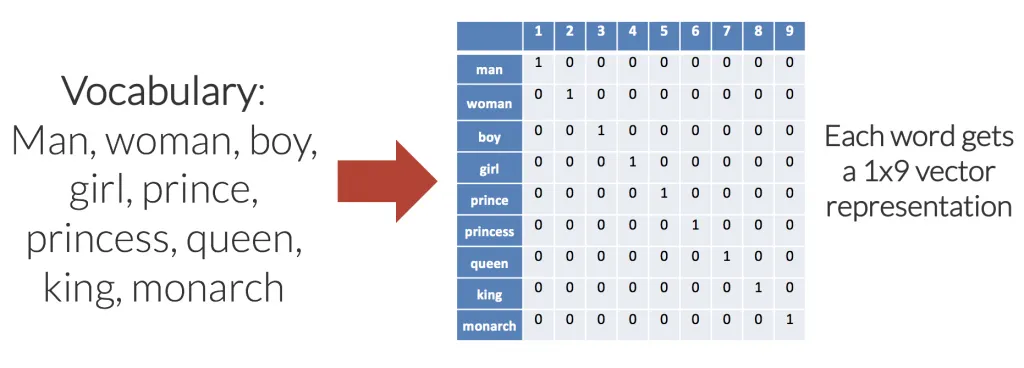


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]

In [8]:
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
term_frequencies = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()
vocab

array(['first', 'in', 'less', 'lot', 'new', 'number', 'of', 'second',
       'sentence', 'short', 'text', 'the', 'three', 'very', 'with',
       'words'], dtype=object)

In [9]:
len(vocab)

16

In [10]:
term_frequencies = term_frequencies.toarray() # convert sparse matrix to numpy array
term_frequencies

array([[2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

In [ ]:
# `fit_transform(corpus)`
# This method performs two operations in one call:
# `fit()``: It iterates through the entire corpus to build a vocabulary of all unique tokens (words).
#   It assigns a unique integer index to each token.
# `transform()``: Using the vocabulary it just built, it converts each document in the corpus into a vector.
#   Each element in the vector corresponds to a word in the vocabulary, and its value is the count of that word in the document.

# The result is a document-term matrix, where rows represent documents and columns represent words from the vocabulary.
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
steps_vectorizer = CountVectorizer()
steps_vectorizer.fit(corpus)
step_term_frequencies = steps_vectorizer.transform(['Just a new sentence with some words.'])
print(step_term_frequencies.toarray())
steps_vocab = steps_vectorizer.get_feature_names_out()
steps_vocab


[[0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]]


array(['first', 'in', 'less', 'lot', 'new', 'number', 'of', 'second',
       'sentence', 'short', 'text', 'the', 'three', 'very', 'with',
       'words'], dtype=object)

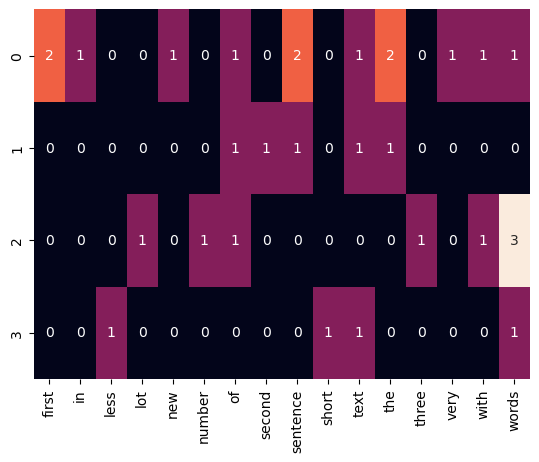

In [11]:
import seaborn as sns
sns.heatmap(term_frequencies, annot=True, cbar = False, xticklabels = vocab);

In [41]:
# Convert another document with countvectorizing
vectorizer.transform(['First new new sentence.']).toarray()

array([[1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

Another approach in countvectorizing is just to place 1 if the word is found in the document (no matter how often) and 0 if the word is not found in the document. In this case we get real 'one-hot' encoding.

In [44]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
one_hot

array([[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

In [45]:
one_hot_vectorizer.transform(['First new new sentence.']).toarray()

array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

<Axes: >

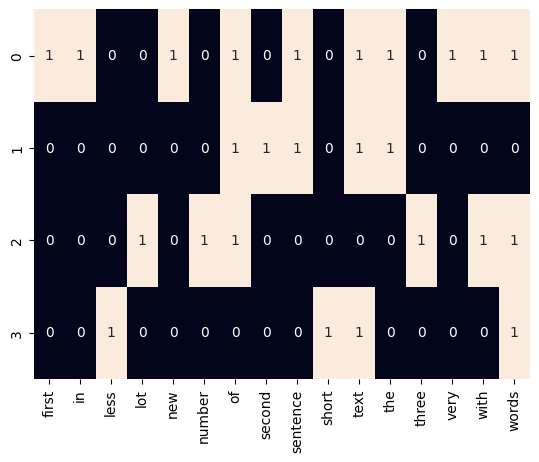

In [ ]:
sns.heatmap(one_hot, annot=True, cbar = False, xticklabels = vocab)

## 2.2 TF-IDF encoding

With a large corpus of documents some words like ‘a’, ‘the’, ‘is’, etc. occur very frequently but they don’t carry a lot of information. Using one-hot encoding approach we can decide that these words are important because they appear in many documents. One of the ways to solve this problem is stopwords filtering, but this solution is discrete and not flexible.

TF-IDF (term frequency - inverse document frequency) can deal with this problem better. TF-IDF lowers the weight of commonly used words and raises the weight of rare words that occur only in current document. TF-IDF formula looks like this:
<br><br>

$tfidf(term, document)= tf(term, document) \cdot idf(term)$

<br>
Where TF is calculated by dividing number of times the word occurs in the document by the total number of words in the document

$tf(term, document)= \frac{n_i}{\sum_{k=1}^W n_k}$

IDF (inverse document frequency), interpreted like inversed number of documents, in which the term we’re interested in occurs. N - number of documents, n(t) - number of documents with current word or term t.


$idf(term) = \log {\frac{N}{n_t}} $

### Example:


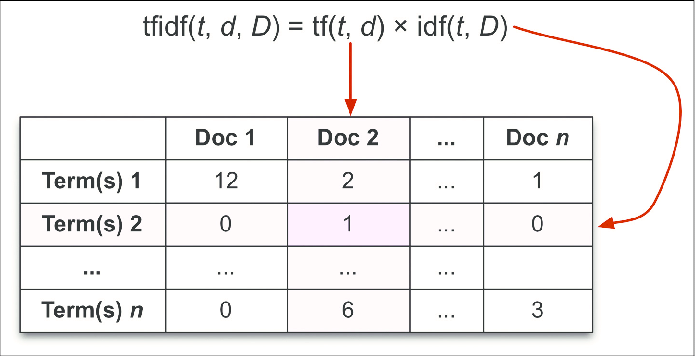




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_corpus = [
          'Time flies like an arrow.',
          'Fruit flies like a banana.'
]

## Step 1: Calculate Term Frequency (TF)

$TF(t,d)=\frac{Total number of terms in document d}{Number of times term t appears in document d}$

Document 1: "Time flies like an arrow." (5 terms)
- TF for 'an', 'arrow', 'flies', 'like', 'time' is 1/5=0.2
- TF for 'banana', 'fruit' is 0

## Step 2: Calculate Inverse Document Frequency (IDF)
$IDF(t)=\ln{(\frac{1 + N}{1 + df(t)})} + 1$
where N is the total number of documents (in our case, N=2) and df(t) is the number of documents containing the term t.

df('flies') = df('like') = 2

$IDF=ln(\frac{1 + 2}{1 + 2}) + 1 = ln(1)+1=1.0$

df('an') = df('arrow') = df('banana') = df('fruit') = df('time') = 1

$IDF=ln(\frac{1 + 2}{1 + 1}) + 1 =ln(1.5)+1≈0.4055+1=1.4055$

## Step 3: Calculate Raw TF-IDF Scores

$TF-IDF(t,d)=TF(t,d)×IDF(t)$

Document 1 Vector:

- an: 0.2×1.4055=0.2811
- arrow: 0.2×1.4055=0.2811
- banana: 0×1.4055=0
- flies: 0.2×1.0=0.2
- fruit: 0×1.4055=0
- like: 0.2×1.0=0.2
- time: 0.2×1.4055=0.2811

Raw Vector 1: `[0.2811, 0.2811, 0, 0.2, 0, 0.2, 0.2811]`

## Step 4: Apply L2 Normalization
The formula for a vector $v=[v_{1}, v_{2},...,v_{k}]$ is:

$v_{i}^{'}=\frac{v_{i}}{\sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{k}^{2}}}$

Norm = $Norm =  \sqrt{0.2811^2 +0.2811^2 +0^2 +0.2^2 +0^2 + 0.2^2 + 0.2811^2} ≈0.563$

Divide each element by the norm:

- $0.2811/0.563≈0.4992$
- $0.2/0.563≈0.3552$

Final Vector 1: `[0.4992, 0.4992, 0, 0.3552, 0, 0.3552, 0.4992]`

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
tfidf


array([[0.49922133, 0.49922133, 0.        , 0.35520009, 0.        ,
        0.35520009, 0.49922133],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

In [ ]:

# tfidf_vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']
# WHY?
# param `token_patternstr`, default=r”(?u)\b\w\w+\b”
# Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'.
# The default regexp selects tokens of 2 or more alphanumeric characters
# (punctuation is completely ignored and always treated as a token separator).
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_vocab

array(['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time'],
      dtype=object)

<Axes: >

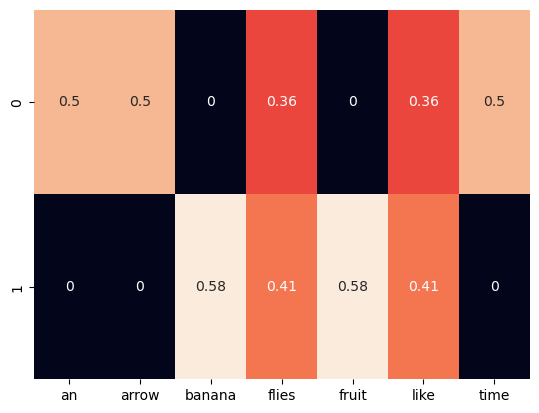

In [ ]:

sns.heatmap(tfidf, annot=True, cbar = False, xticklabels = tfidf_vocab)

## 2.3 Word2Vec and GloVe

The most commonly used models for word embeddings are [word2vec](https://github.com/dav/word2vec/) and [GloVe](https://nlp.stanford.edu/projects/glove/) which are both unsupervised approaches based on the distributional hypothesis (words that occur in the same contexts tend to have similar meanings).

Word2Vec word embeddings are vector representations of words,
that are typically learnt by an unsupervised model when fed
with large amounts of text as input (e.g. Wikipedia, science, news, articles etc.). These representation of words capture semantic similarity between words among other properties. Word2Vec word embeddings are learnt in a such way, that [distance](https://en.wikipedia.org/wiki/Euclidean_distance) between vectors for words with close meanings ("king" and "queen" for example) are closer than distance for words with complety different meanings ("king" and "carpet" for example).

### Example:


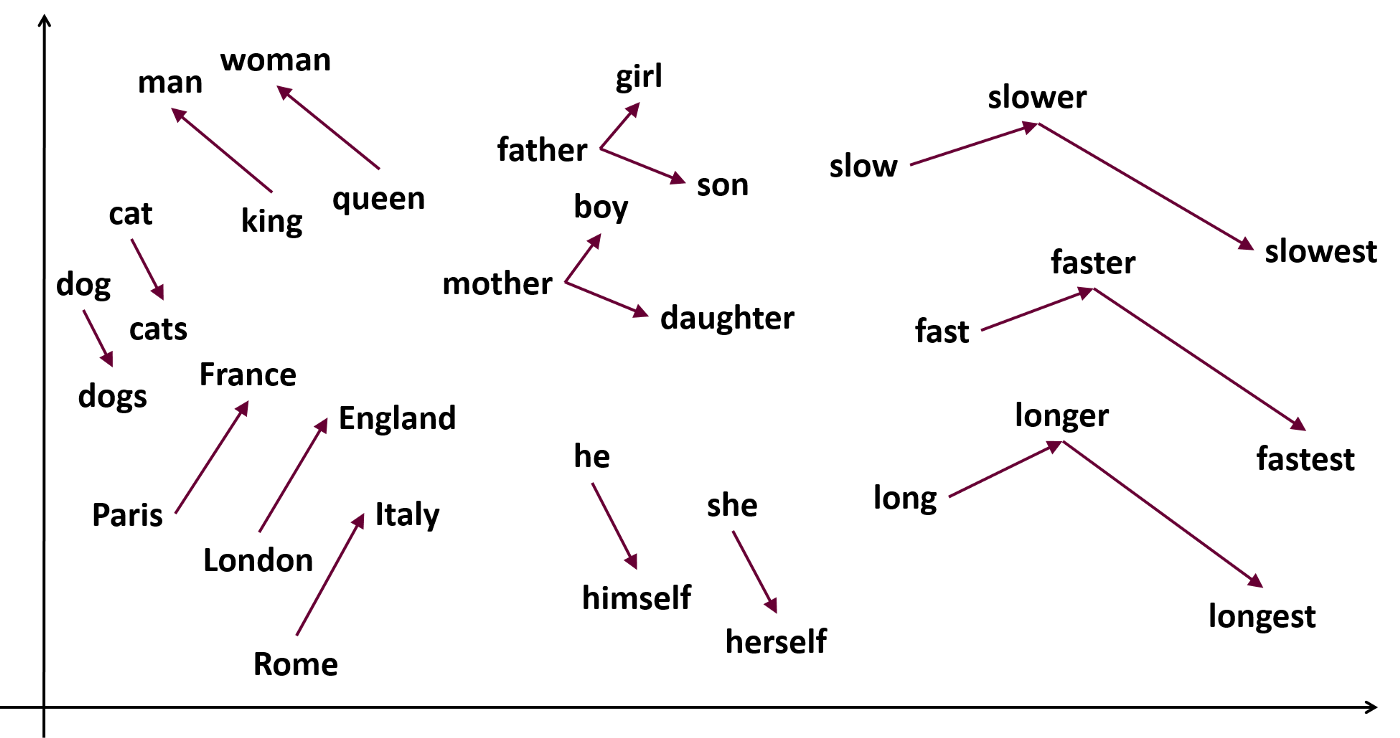



In [23]:
# Download Google Word2Vec embeddings https://code.google.com/archive/p/word2vec/

!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip GoogleNews-vectors-negative300.bin
!pip install gensim

--2025-07-24 16:14:46--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.236.168, 54.231.160.248, 54.231.159.16, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.236.168|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-24 16:14:47 ERROR 404: Not Found.

gunzip: can't stat: GoogleNews-vectors-negative300.bin (GoogleNews-vectors-negative300.bin.gz): No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 9.9 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.1
    Uninstalling scipy-1.15.1:
      Successfully uninstalled scipy-1.15.1━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [scipy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [gensim]2m3/4 [gensim]


In [32]:
# Try Word2Vec with Gensim

import gensim.downloader as api

# Load pretrained vectors from Google
model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [34]:
king = model['king']
print(king.shape)
print(king)

(50,)
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


In [36]:
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.8523604273796082), ('throne', 0.7664334177970886), ('prince', 0.759214460849762), ('daughter', 0.7473882436752319), ('elizabeth', 0.7460219860076904), ('princess', 0.7424570322036743), ('kingdom', 0.7337412238121033), ('monarch', 0.7214491367340088), ('eldest', 0.7184861898422241), ('widow', 0.7099431157112122)]


In [37]:
print(model.doesnt_match("breakfast robot dinner lunch".split()))

robot


In [38]:
print(model.similarity('woman', 'man'))

0.8860338


In [39]:
print(model.similarity('king', 'woman'))

0.41133782


In [40]:
print(model.similarity('woman', 'queen'))

0.60031056


In [44]:
print(model.similarity('king', 'robot'))

0.19553997


Another word embedding method is **Glove** (“Global Vectors”). It is based on matrix factorization techniques on the word-context matrix. It first constructs a large matrix of (words x context) co-occurrence information, i.e. for each “word” (the rows), you count how frequently we see this word in some “context” (the columns) in a large corpus. Then this matrix is factorized to a lower-dimensional (word x features) matrix, where each row now stores a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

In [47]:
# Try Glove word embeddings with Spacy
!pip install spacy
!python3 -m spacy download en_core_web_lg

  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.7/634.7 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.4/839.4 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.0 MB/s eta 0:00:00a 0:00:01
Using cached typer-0.16.0-py3-none-any.whl (46 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 3.3 MB/s eta 0:00:00a 0:00:01
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Using cached shellingham-1.5.4-py2.py3-none-any.whl 

In [51]:
import spacy
# Load the spacy model that you have installed
import en_core_web_lg
nlp = en_core_web_lg.load()
# process a sentence using the model
doc = nlp("man king stands on the carpet and sees woman queen")
# Get the vector for 'king':
print(doc[1].vector.shape)
doc[1].vector[:50]

(300,)


array([ 0.31542  , -0.35068  ,  0.42923  , -0.53825  , -0.1848   ,
       -0.31082  ,  0.29196  , -0.7103   , -0.23867  ,  1.8471   ,
       -0.36446  , -0.51282  ,  0.1221   ,  0.38909  , -0.073204 ,
        0.035462 ,  0.33289  ,  0.66466  ,  0.027175 ,  0.42021  ,
       -0.1452   ,  0.37991  , -0.6052   ,  0.10695  , -0.64716  ,
       -0.010739 , -0.39754  ,  0.38857  , -0.20134  ,  0.69813  ,
       -0.32411  ,  0.73085  , -0.1093   , -0.23511  ,  0.18482  ,
       -0.11595  , -0.71003  , -0.22974  , -0.41979  ,  0.0081004,
       -0.10504  , -0.44802  , -0.073928 , -0.4238   ,  0.28482  ,
       -0.074517 ,  0.098161 ,  0.64602  , -0.25832  , -0.020452 ],
      dtype=float32)

Find similarity between King and Queen (higher value is better).

In [ ]:
doc[1].similarity(doc[9])

0.7252610921859741

Find similarity between King and carpet

In [ ]:
doc[1].similarity(doc[5])

0.20431946218013763

Check if king - man + woman = queen. We will multiply vectors for 'man' and 'woman' by two, because subtracting the vector for 'man' and adding the vector for 'woman' will do little to the original vector for “king”, likely because those “man” and “woman” are related themselves.

In [59]:
# v =  doc[1].vector - (doc[0].vector) + (doc[8].vector)
v =  doc[1].vector - (doc[0].vector*2) + (doc[8].vector*2)
v

array([ 0.712754  , -0.20624   ,  0.05630401,  0.62922996, -0.33405   ,
       -0.32917994,  0.35588   , -0.63176   ,  0.03896999,  1.9828997 ,
       -0.7717    , -0.036082  , -0.4219134 , -0.2288734 , -0.39632398,
       -0.257362  , -0.538078  ,  1.04298   , -0.564305  ,  0.35007   ,
       -0.12709999,  0.89014995, -0.91889   , -0.61249   , -0.70478   ,
        0.790441  , -0.18181998, -0.03685001, -0.83111995,  0.34461606,
       -0.05571002,  0.61666995,  0.3444    , -0.704682  ,  0.99318   ,
        0.37484598, -0.43377   , -0.8651601 , -0.54863   ,  0.1090004 ,
        1.0698    , -0.12551999, -0.329508  , -0.52566   ,  0.40131795,
       -0.38313898, -0.45103902,  0.5648801 ,  0.67260003, -0.55907404,
       -1.459715  ,  0.35917002, -0.58002   , -0.96379596,  0.19972001,
        0.5178399 , -0.00740319, -0.502858  , -0.927108  ,  0.41625696,
        0.02304001, -1.0703499 ,  0.411865  ,  0.43028998,  0.50001407,
        0.7369099 ,  0.93891   ,  0.50217795,  0.756953  ,  0.23

In [60]:
from scipy.spatial import distance
import numpy as np

# Format the vocabulary for use in the distance function
vectors = [token.vector for token in doc]
vectors = np.array(vectors)

# Find the closest word below
closest_index = distance.cdist(np.expand_dims(v, axis = 0), vectors, metric = 'cosine').argmin()
output_word = doc[closest_index].text


In [61]:
output_word

'queen'

## 2.4 Transformers

At last it's time for current state-of-the-art approach - Transformers. Famous [GPT-2](https://openai.com/blog/better-language-models/), [BERT](https://github.com/google-research/bert), [CTRL](https://blog.einstein.ai/introducing-a-conditional-transformer-language-model-for-controllable-generation/) are all Transformers-based and produce context-sensitive embeddings like ELMo. But unlike ELMo Transformers do not use [RNN](https://en.wikipedia.org/wiki/Recurrent_neural_network), trey do not require to process words in sentence sequentially one-by-one. All words in the sentence are processed in parallel, this approach speeds up processing and solves [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Transformers use the [attention mechanizm](https://arxiv.org/abs/1706.03762) to describe the connections and dependencies of each specific word with all other words in the sentence. This mechanism and the main principles of Transformers described in detail in a beautifully illustrated [article](http://jalammar.github.io/illustrated-transformer/) by Jay Alammar.

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png) Image from[ http://jalammar.github.io](http://jalammar.github.io/illustrated-transformer/)



For our example we wil use brilliant [Transformers](https://huggingface.co/transformers/) library, which contains the latest Transformers-based models (such as [BERT](https://huggingface.co/transformers/model_doc/bert.html), [XLNet](https://huggingface.co/transformers/model_doc/xlnet.html), [DialoGPT](https://huggingface.co/transformers/model_doc/dialogpt.html) or [GPT-2](https://huggingface.co/transformers/model_doc/gpt2.html)).

Let's make some embeddings with BERT. Firstly we will need to install Transformers library.

In [6]:
!pip install torch
!pip install transformers
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


Now we import pytorch, the pretrained BERT model, and a BERT tokenizer, that will do all the needed work of converting sentences into format appropriate for BERT (tokenizing itself and adding special tokens like [SEP] and [CLS]).

In [1]:
import torch
torch.manual_seed(0)
from transformers import BertTokenizer, BertModel

import logging
import matplotlib.pyplot as plt


# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/opt/homebrew/Caskroom/miniconda/base/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Enter some sentences and tokenize them.

In [2]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

sentences

['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
 'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
 'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
 'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

In [3]:
# Print the original sentence.
print(' Original: ', sentences[0][:99])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0])[:15])

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])


 Original:  king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle 
Tokenized:  ['king', 'arthur', ',', 'also', 'called', 'arthur', 'or', 'aa', '##th', '##ur', 'pen', '##dra', '##gon', ',', 'legendary']
Token IDs:  [2332, 4300, 1010, 2036, 2170, 4300, 2030, 9779, 2705, 3126, 7279, 7265, 7446, 1010, 8987]


Note that some tokens may look like this: ['aa', '##th', '##ur', 'pen', '##dra', '##gon']. This is because of the BERT tokenizer was created with a WordPiece model. This model greedily creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data. BERT tokenizer uses vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on. So, if the word is not mentioned in a vocabulary, that words is splitted into subwords and characters.  The two hash signs (##) before some subwords shows that subword is part of a larger word and preceded by another subword.   

We will use tokenizer.encode_plus function, that will:

- Split the sentence into tokens.
- Add the special [CLS] and [SEP] tokens.
- Map the tokens to their IDs.
- Pad or truncate all sentences to the same length.
- Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.


In [4]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
tokenized_texts = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        truncation=True,
        max_length=48,
        padding='max_length',
        return_tensors='pt',
        return_attention_mask=True
    )

    tokenized_texts.append(tokenizer.tokenize("[CLS] " + sent + " [SEP]"))
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert lists to tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Print results
print('Token IDs:', input_ids[0])
print('Tokenized (first 15):', tokenizer.tokenize(sentences[0])[:15])
print('Token ID values (first 15):', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])

Token IDs: tensor([  101,  2332,  4300,  1010,  2036,  2170,  4300,  2030,  9779,  2705,
         3126,  7279,  7265,  7446,  1010,  8987,  2329,  2332,  2040,  3544,
         1999,  1037,  5402,  1997,  5781,  7472,  2015,  1006,  2124,  2004,
         1996,  3043,  1997,  3725,  1007,  2004,  1996, 11074,  1997,  1037,
         5000,  2135,  7881,  1997,  1996,  2461,  2795,   102])
Tokenized (first 15): ['king', 'arthur', ',', 'also', 'called', 'arthur', 'or', 'aa', '##th', '##ur', 'pen', '##dra', '##gon', ',', 'legendary']
Token ID values (first 15): [2332, 4300, 1010, 2036, 2170, 4300, 2030, 9779, 2705, 3126, 7279, 7265, 7446, 1010, 8987]


**Segment ID**. BERT is trained on and expects sentence pairs using 1s and 0s to distinguish between the two sentences. We will encode each sentence separately so we will just mark each token in each sentence with 1.

In [5]:
segments_ids = torch.ones_like(input_ids)
segments_ids.shape

torch.Size([4, 48])

Now we can call BERT model and finally get embeddings.

In [6]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
model.eval();

In [7]:
with torch.no_grad():

    outputs = model(input_ids, segments_ids)

    # Evaluating the model will return a different number of objects based on
    # how it's  configured in the `from_pretrained` call earlier. In this case,
    # becase we set `output_hidden_states = True`, the third item will be the
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

/opt/homebrew/Caskroom/miniconda/base/envs/nlp/lib/python3.10/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Let's examine what we've got.

In [8]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
print ("Number of batches:", len(hidden_states[0]))
print ("Number of tokens:", len(hidden_states[0][0]))
print ("Number of hidden units:", len(hidden_states[0][0][0]))


Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 4
Number of tokens: 48
Number of hidden units: 768


In [9]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 4, 48, 768])

In [10]:
# Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]
token_embeddings = token_embeddings.permute(1,2,0,3)

token_embeddings.size()

torch.Size([4, 48, 13, 768])

In [11]:
# we will use last four hidden layers to create each word embedding

processed_embeddings = token_embeddings[:, :, 9:, :]
processed_embeddings.shape

torch.Size([4, 48, 4, 768])

In [12]:
# Concatenate four layers for each token to create embeddings

embeddings = torch.reshape(processed_embeddings, (4, 48, -1))
embeddings.shape

torch.Size([4, 48, 3072])

Let's examine embeddings for the first sentence. Firstly we need to get ids of tokens we need to compare.

In [13]:
for i, token_str in enumerate(tokenized_texts[0]):
  print (i, token_str)

0 [CLS]
1 king
2 arthur
3 ,
4 also
5 called
6 arthur
7 or
8 aa
9 ##th
10 ##ur
11 pen
12 ##dra
13 ##gon
14 ,
15 legendary
16 british
17 king
18 who
19 appears
20 in
21 a
22 cycle
23 of
24 medieval
25 romance
26 ##s
27 (
28 known
29 as
30 the
31 matter
32 of
33 britain
34 )
35 as
36 the
37 sovereign
38 of
39 a
40 knight
41 ##ly
42 fellowship
43 of
44 the
45 round
46 table
47 .
48 [SEP]


We can see that word 'king' is places at indexes 1 and 17. We will check distance between embeddings 1 and 17. Also, we will check if embedding for word 'arthur' is closer to king then word 'table'.

In [15]:
from scipy.spatial.distance import cosine

kings = cosine(embeddings[0][1], embeddings[0][17])
king_table = cosine(embeddings[0][1], embeddings[0][46])
king_archtur = cosine(embeddings[0][2], embeddings[0][1])

print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

Distance for two kings:  0.21
Distance from king to table:  0.73
Distance from Archtur to king:  0.40


So we see that embeddings for two 'kings' are quite similar but not same, and Archtur is closer to be a king than a table.

In [16]:
!pip install bertviz

  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 8.5 MB/s eta 0:00:00a 0:00:01
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [bertviz]m5/6 [bertviz]]


In [17]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view
import torch

# Step 1: Load model with attention outputs
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)
model.eval()

# Step 2: Prepare a single sentence (head_view only supports one at a time)
sentence = "King Arthur was a legendary British king."
inputs = tokenizer(sentence, return_tensors='pt')

# Step 3: Forward pass with attention outputs
with torch.no_grad():
    outputs = model(**inputs)
    attention = outputs.attentions  # a tuple with attention maps from each layer

# Step 4: Use head_view
head_view(attention, tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

/opt/homebrew/Caskroom/miniconda/base/envs/nlp/lib/python3.10/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSelfAttention.forward`.
  return forward_call(*args, **kwargs)


<IPython.core.display.Javascript object>

## References

- [BERT Word Embeddings Tutorial](https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/)
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
- [FROM Pre-trained Word Embeddings TO Pre-trained Language Models — Focus on BERT](https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598)
- [ Make your own Rick Sanchez (bot) with Transformers and DialoGPT fine-tuning](https://towardsdatascience.com/make-your-own-rick-sanchez-bot-with-transformers-and-dialogpt-fine-tuning-f85e6d1f4e30)
- [Playing with word vectors](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519)
- [Intuitive Guide to Understanding GloVe Embeddings](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)
- [Word Embeddings in Python with Spacy and Gensim](https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/)
- [Brief review of word embedding families (2019) ](https://medium.com/analytics-vidhya/brief-review-of-word-embedding-families-2019-b2bbc601bbfe)
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)